<a href="https://colab.research.google.com/github/tsengchiungchen/MNIST/blob/main/DNN%E5%81%9A%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
%env KERAS_BACKEND=tensorflow


env: KERAS_BACKEND=tensorflow


In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[9487].shape


(28, 28)

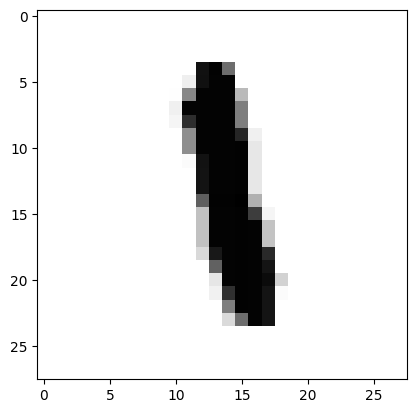

In [ ]:
plt.imshow(x_train[9487], cmap='Greys')

In [ ]:
y_train[9487]

1

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
from keras.utils import np_utils


In [ ]:
y_train = np_utils.to_categorical(y_train,10)


In [ ]:
y_test = np_utils.to_categorical(y_test,10)


In [ ]:
y_train[9487]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 500)               5500      
                                                                 
 activation_2 (Activation)   (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

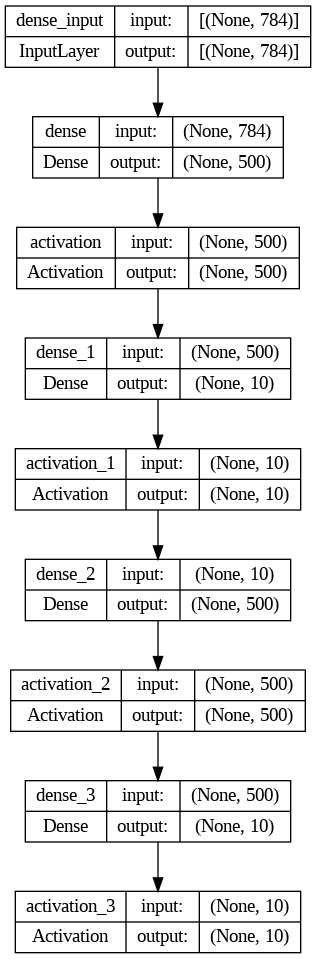

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='.\data\model01.png')

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0900 - accuracy: 0.1084
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0900 - accuracy: 0.1115
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0900 - accuracy: 0.1106
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0900 - accuracy: 0.1143
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0899 - accuracy: 0.1133
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0899 - accuracy: 0.1134
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0899 - accuracy: 0.1161
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0899 - accuracy: 0.1179
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0898 - accuracy: 0.1179
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0898 - accuracy: 0.1207

In [ ]:
from ipywidgets import interact_manual

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[測試編號])

In [ ]:
interact_manual(test, 測試編號 = (0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.2037


In [ ]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08796573430299759
測試資料正確率: 0.2037000060081482
